# Myers-Brigs Type Indicator - MBTI
MBTI identifica cuatro dicotomías separadas:
Extraversión vs Introversión, Sensación vs Intuición, Pensamiento vs Sentimiento, y Juicio vs Percepción. Se supone que un individuo tiene preferencia por una de cada par de opuestos sobre la otra. 

<table align='center'>
<tr>
<th colspan=2> Extraversión - Introversión <br/> (actitudes u orientaciones de energía) </th>
</tr>

<tr>
<th> Extraversión (E) </th>
<th> Introversión (I) </th>
</tr>
<tr>
<td>
    Están orientados principalmente hacia el mundo exterior, tienden a enfocar su energía en las personas y los objetos.
</td>
<td>
    Están orientados principalmente hacia el mundo interior, tienden a enfocar su energía en conceptos, ideas y experiencias internas.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (funciones o procesos de percepción) </th>
</tr>
<tr>
<th> Sensación (S) </th>
<th> Intuición (N) </th>
</tr>
<tr>
<td>
    Están orientados principalmente hacia lo que se puede percibir por los cinco sentidos.
</td>
<td>
    Están enfocados principalmente en percibir patrones e interrelaciones.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (funciones o procesos de juicio) </th>
</tr>
<tr>
<th> Pensamiento (T) </th>
<th> Sentimiento (F) </th>
</tr>
<tr>
<td>
    Basando conclusiones en análisis lógicos con un enfoque en la objetividad y la distancia emocional.
</td>
<td>
    Basando conclusiones en valores personales o sociales con un enfoque en la comprensión y la armonía.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (actitudes u orientaciones hacia cómo se enfrenta el mundo exterior) </th>
</tr>
<tr>
<th> Juicio (J) </th>
<th> Percepción (P) </th>
</tr>
<tr>
<td>
    Prefiriendo la determinación y el cierre que resultan al lidiar con el mundo exterior utilizando uno de los procesos de Juicio.
</td>
<td>
    Prefiriendo la flexibilidad y espontaneidad que resulta al lidiar con el mundo exterior utilizando uno de los procesos de Percepción.  
</td>
</tr>
</table>

![](mbti.jpg)

## EDA → Análisis exploratorio de las palabras más repetidas por cada tipo de personalidad

In [218]:
# importaciones
import pandas as pd
import matplotlib.pyplot as plt


In [203]:
# Leemos el dataset
mbti = pd.read_csv('../data/MBTI500.data.enriched.txt', sep='\t', header=0, encoding='utf-8')

# Exploramos para ver qué información tenemos y como está dispuesta
mbti.head()

,personality,count,actually,also,always,come,could,de,det,en,...,type,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0,3437,0,2409,0,0,0,3817,...,4462,2421,2421,4354,3903,2921,2824,5231,0,0
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,12209,0,0,19387,15935,11149,13580,16753,0,0
2,ENTJ,2955,0,6325,0,4292,0,0,0,8349,...,7091,4990,4990,8172,6828,5514,6942,9739,0,0
3,ENTP,11725,0,24268,0,16825,17334,0,0,27712,...,25091,21804,21804,30172,29124,22458,25334,37707,0,0
4,ESFJ,181,0,450,332,314,0,0,0,0,...,891,335,335,507,488,381,0,626,0,0


In [204]:
mbti.info

<bound method DataFrame.info of    personality  count  actually   also  always   come  could   de   det  \
0         ENFJ   1534         0   3437       0   2409      0    0     0   
1         ENFP   6167         0  13704   10250  10208      0    0     0   
2         ENTJ   2955         0   6325       0   4292      0    0     0   
3         ENTP  11725         0  24268       0  16825  17334    0     0   
4         ESFJ    181         0    450     332    314      0    0     0   
5         ESFP    360         0    774       0    585      0    0     0   
6         ESTJ    482         0    926       0      0      0  780  1753   
7         ESTP   1986      2550   4787       0      0   2764    0     0   
8         INFJ  14963         0  33727       0  24270      0    0     0   
9         INFP  12134         0  26719   20017  18875      0    0     0   
10        INTJ  22427         0  48949       0  33612  32442    0     0   
11        INTP  24961         0  53800       0  35797  37653    0   

In [205]:
mbti.dtypes

personality    object
count           int64
actually        int64
also            int64
always          int64
                ...  
well            int64
work            int64
would           int64
yeah            int64
year            int64
Length: 89, dtype: object

In [206]:
# Comprobamos si hay valores faltantes
mbti.isna().sum()

personality    0
count          0
actually       0
also           0
always         0
              ..
well           0
work           0
would          0
yeah           0
year           0
Length: 89, dtype: int64

No existen valores faltantes.

In [207]:
mbti

,personality,count,actually,also,always,come,could,de,det,en,...,type,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0,3437,0,2409,0,0,0,3817,...,4462,2421,2421,4354,3903,2921,2824,5231,0,0
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,12209,0,0,19387,15935,11149,13580,16753,0,0
2,ENTJ,2955,0,6325,0,4292,0,0,0,8349,...,7091,4990,4990,8172,6828,5514,6942,9739,0,0
3,ENTP,11725,0,24268,0,16825,17334,0,0,27712,...,25091,21804,21804,30172,29124,22458,25334,37707,0,0
4,ESFJ,181,0,450,332,314,0,0,0,0,...,891,335,335,507,488,381,0,626,0,0
5,ESFP,360,0,774,0,585,0,0,0,0,...,1458,648,648,810,857,692,552,1277,622,0
6,ESTJ,482,0,926,0,0,0,780,1753,810,...,1862,807,807,1047,979,710,828,1529,0,0
7,ESTP,1986,2550,4787,0,0,2764,0,0,0,...,3167,2705,3778,4199,3626,3759,3014,7024,0,2585
8,INFJ,14963,0,33727,0,24270,0,0,0,0,...,29741,23748,23748,44660,40800,27674,32591,44185,0,0
9,INFP,12134,0,26719,20017,18875,0,0,0,0,...,24522,18247,18247,34838,30809,22687,23215,35937,0,0


Vamos a eliminar las palabras que tengan menos de tres letras, ya que no nos van a servir

In [208]:
# eliminando columnas cuyo nombre es menor a 3

mbti = mbti.drop([columna for columna in mbti.columns if len(columna) < 3], axis=1)

In [209]:
mbti.shape

(16, 79)

→ Se eliminaron 10 columnas

→ Vamos a ver qué palabras hay en el dataset

In [210]:
mbti.columns

Index(['personality', 'count', 'actually', 'also', 'always', 'come', 'could',
       'det', 'enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
       'even', 'feel', 'find', 'friend', 'function', 'german', 'germany',
       'get', 'give', 'good', 'help', 'ikke', 'infj', 'infp', 'interest',
       'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp', 'jeg', 'know', 'life',
       'like', 'lol', 'look', 'lot', 'love', 'make', 'mean', 'much', 'need',
       'one', 'people', 'person', 'pretty', 'really', 'right', 'say', 'see',
       'seem', 'someone', 'something', 'still', 'take', 'talk', 'thank',
       'thing', 'think', 'though', 'til', 'time', 'try', 'type', 'use', 'want',
       'way', 'well', 'work', 'would', 'yeah', 'year'],
      dtype='object')

Como podemos observar dentro de las palabras están las abreviaciones de personalidades, las eliminamos ya que no nos proporcionarán información relevante.

In [211]:
abv = ['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp', 'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp',]

mbti = mbti.drop([column for column in  mbti.columns if column in abv], axis=1)

##### Normalizar palabras

In [212]:
# Tomamos el data set desde la columna 3 ya que las dos primeras son el tipo de personalidad y el count
palabras = mbti.iloc[:,2:].columns.tolist()

for palabra in palabras:
    mbti[palabra] = mbti[palabra] / mbti['count']

mbti

,personality,count,actually,also,always,come,could,det,even,feel,...,try,type,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0.000000,2.240548,0.000000,1.570404,0.000000,0.000000,1.769231,4.864407,...,2.188396,2.908735,1.578227,2.838331,2.544329,1.904172,1.840939,3.410039,0.000000,0.000000
1,ENFP,6167,0.000000,2.222150,1.662072,1.655262,0.000000,0.000000,1.871088,4.717529,...,2.219069,1.979731,0.000000,3.143668,2.583914,1.807848,2.202043,2.716556,0.000000,0.000000
2,ENTJ,2955,0.000000,2.140440,0.000000,1.452453,0.000000,0.000000,1.746193,2.749915,...,1.952284,2.399662,1.688663,2.765482,2.310660,1.865990,2.349239,3.295770,0.000000,0.000000
3,ENTP,11725,0.000000,2.069765,0.000000,1.434968,1.478380,0.000000,1.893049,2.818081,...,1.979872,2.139957,1.859616,2.573305,2.483923,1.915394,2.160682,3.215949,0.000000,0.000000
4,ESFJ,181,0.000000,2.486188,1.834254,1.734807,0.000000,0.000000,1.839779,3.834254,...,1.734807,4.922652,1.850829,2.801105,2.696133,2.104972,0.000000,3.458564,0.000000,0.000000
5,ESFP,360,0.000000,2.150000,0.000000,1.625000,0.000000,0.000000,0.000000,3.161111,...,1.675000,4.050000,1.800000,2.250000,2.380556,1.922222,1.533333,3.547222,1.727778,0.000000
6,ESTJ,482,0.000000,1.921162,0.000000,0.000000,0.000000,3.636929,1.495851,2.209544,...,1.502075,3.863071,1.674274,2.172199,2.031120,1.473029,1.717842,3.172199,0.000000,0.000000
7,ESTP,1986,1.283988,2.410373,0.000000,0.000000,1.391742,0.000000,1.974320,1.422961,...,1.360524,1.594663,1.902316,2.114300,1.825780,1.892749,1.517623,3.536757,0.000000,1.301611
8,INFJ,14963,0.000000,2.254027,0.000000,1.622001,0.000000,0.000000,2.016908,4.865669,...,2.290316,1.987636,1.587115,2.984696,2.726726,1.849495,2.178106,2.952951,0.000000,0.000000
9,INFP,12134,0.000000,2.201994,1.649662,1.555546,0.000000,0.000000,2.039146,4.937943,...,2.097824,2.020933,1.503791,2.871106,2.539064,1.869705,1.913219,2.961678,0.000000,0.000000


## Frecuencias de las palabras más repetidas

Según lo investigado sobre los tipos de personalidad los podemos dividir en 4 subgrupos:

![](subgrupos-mbti.jpg)

1. NF (manifestar valores universales y valorar a las personas)
    - ENFJ
    - ENFP
    - INFJ
    - INFP
2. NT (empujando a las personas con ideas hacia un futuro optimista)
    - ENTJ
    - ENTP
    - INTJ
    - INTP
3. SF (incluyendo y construyendo confianza)
    - ESFJ
    - ESFP
    - ISFJ
    - ISFP
4. ST (acción desde una perspectiva estratégica)
    - ESTJ
    - ESTP
    - ISTJ
    - ISTP

In [219]:
# Subgrupos
group_mapping = {
    'NF':'NF',
    'NT':'NT',    
    'SF':'SF',
    'ST':'ST'
}

# Creo una nueva columna con el grupo al que pertenece cada uno
mbti['grupo'] = mbti['personality'].apply(lambda x: next((group for pattern, group in group_mapping.items() if pattern in x), None))

mbti

,personality,count,actually,also,always,come,could,det,even,feel,...,type,use,want,way,well,work,would,yeah,year,grupo
0,ENFJ,1534,0.000000,2.240548,0.000000,1.570404,0.000000,0.000000,1.769231,4.864407,...,2.908735,1.578227,2.838331,2.544329,1.904172,1.840939,3.410039,0.000000,0.000000,NF
1,ENFP,6167,0.000000,2.222150,1.662072,1.655262,0.000000,0.000000,1.871088,4.717529,...,1.979731,0.000000,3.143668,2.583914,1.807848,2.202043,2.716556,0.000000,0.000000,NF
2,ENTJ,2955,0.000000,2.140440,0.000000,1.452453,0.000000,0.000000,1.746193,2.749915,...,2.399662,1.688663,2.765482,2.310660,1.865990,2.349239,3.295770,0.000000,0.000000,NT
3,ENTP,11725,0.000000,2.069765,0.000000,1.434968,1.478380,0.000000,1.893049,2.818081,...,2.139957,1.859616,2.573305,2.483923,1.915394,2.160682,3.215949,0.000000,0.000000,NT
4,ESFJ,181,0.000000,2.486188,1.834254,1.734807,0.000000,0.000000,1.839779,3.834254,...,4.922652,1.850829,2.801105,2.696133,2.104972,0.000000,3.458564,0.000000,0.000000,SF
5,ESFP,360,0.000000,2.150000,0.000000,1.625000,0.000000,0.000000,0.000000,3.161111,...,4.050000,1.800000,2.250000,2.380556,1.922222,1.533333,3.547222,1.727778,0.000000,SF
6,ESTJ,482,0.000000,1.921162,0.000000,0.000000,0.000000,3.636929,1.495851,2.209544,...,3.863071,1.674274,2.172199,2.031120,1.473029,1.717842,3.172199,0.000000,0.000000,ST
7,ESTP,1986,1.283988,2.410373,0.000000,0.000000,1.391742,0.000000,1.974320,1.422961,...,1.594663,1.902316,2.114300,1.825780,1.892749,1.517623,3.536757,0.000000,1.301611,ST
8,INFJ,14963,0.000000,2.254027,0.000000,1.622001,0.000000,0.000000,2.016908,4.865669,...,1.987636,1.587115,2.984696,2.726726,1.849495,2.178106,2.952951,0.000000,0.000000,NF
9,INFP,12134,0.000000,2.201994,1.649662,1.555546,0.000000,0.000000,2.039146,4.937943,...,2.020933,1.503791,2.871106,2.539064,1.869705,1.913219,2.961678,0.000000,0.000000,NF


In [214]:
# Groupby para ver qué subgrupo repitió más cada palabra.

group_mbti = mbti.groupby('grupo').sum()
group_mbti=group_mbti.drop(['personality', 'count'], axis=1)

group_mbti.style.highlight_max(color='cadetblue')

,actually,also,always,come,could,det,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,jeg,know,life,like,lol,look,lot,love,make,mean,much,need,one,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,0.000000,8.918719,3.311734,6.403213,0.000000,0.000000,7.696373,19.385547,8.443070,9.295975,1.640156,0.000000,0.000000,20.493291,0.000000,13.387543,1.641716,0.000000,0.000000,0.000000,15.992384,5.669350,28.484934,0.000000,1.516400,7.889305,9.622043,16.007790,3.129304,9.276904,7.660019,13.976214,21.848989,4.813973,0.000000,14.208692,0.000000,13.424239,9.540571,0.000000,7.358890,8.691629,0.000000,8.213592,3.308560,0.000000,16.043356,23.615007,1.542855,0.000000,13.816451,8.795606,8.897035,4.669133,11.837801,10.394033,7.431221,8.134307,12.041224,0.000000,0.000000
NT,0.000000,8.548160,0.000000,5.820268,4.433413,0.000000,7.567911,11.390341,7.589958,6.299350,0.000000,0.000000,0.000000,19.992465,2.840276,12.877423,0.000000,0.000000,1.399984,0.000000,13.488783,4.626203,24.795999,0.000000,5.852360,6.579949,1.346531,15.201648,6.274471,8.161924,7.171717,13.942945,20.557705,0.000000,0.000000,10.963890,0.000000,12.961190,8.791415,0.000000,5.881175,8.183871,0.000000,7.936407,1.413134,0.000000,14.551596,21.683870,1.394115,0.000000,12.613801,8.009780,8.014891,7.138679,10.544035,9.719066,7.351697,9.082124,13.012384,0.000000,0.000000
SF,0.000000,9.106913,5.090913,4.895807,0.000000,0.000000,5.614372,14.934794,5.457943,8.878687,7.254182,0.000000,0.000000,20.039402,0.000000,12.126501,0.000000,0.000000,0.000000,0.000000,16.443305,0.000000,33.169265,1.740331,3.349778,8.799614,6.317765,15.403446,3.481444,9.342277,1.661538,14.335492,21.370379,0.000000,1.566667,14.135139,0.000000,15.471597,9.703805,1.675000,1.683077,8.275054,0.000000,7.850100,3.494807,1.823204,15.864998,27.063399,5.374955,0.000000,12.766807,7.512356,16.008300,7.150565,10.176819,10.037304,8.032030,5.042081,13.915720,1.727778,0.000000
ST,1.283988,8.500969,1.407884,3.040185,2.992708,3.636929,7.228588,9.627289,3.565755,3.729866,1.520747,1.448137,1.448137,19.162658,1.408586,11.060534,0.000000,2.049793,0.000000,1.510373,12.936810,0.000000,24.398855,0.000000,3.009949,6.428614,0.000000,13.364725,4.619575,7.661661,3.665147,12.743317,18.344409,0.000000,0.000000,11.003406,1.506546,12.955387,8.853763,0.000000,3.045647,7.238482,1.322759,7.271370,3.400391,0.000000,12.348177,20.497775,3.102182,1.487552,11.408810,7.020248,10.189547,7.189484,9.803512,8.612263,7.054852,8.189058,13.678572,0.000000,1.301611


In [215]:
group_mbti.style.highlight_max(color='cadetblue', axis=1)

,actually,also,always,come,could,det,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,jeg,know,life,like,lol,look,lot,love,make,mean,much,need,one,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,0.000000,8.918719,3.311734,6.403213,0.000000,0.000000,7.696373,19.385547,8.443070,9.295975,1.640156,0.000000,0.000000,20.493291,0.000000,13.387543,1.641716,0.000000,0.000000,0.000000,15.992384,5.669350,28.484934,0.000000,1.516400,7.889305,9.622043,16.007790,3.129304,9.276904,7.660019,13.976214,21.848989,4.813973,0.000000,14.208692,0.000000,13.424239,9.540571,0.000000,7.358890,8.691629,0.000000,8.213592,3.308560,0.000000,16.043356,23.615007,1.542855,0.000000,13.816451,8.795606,8.897035,4.669133,11.837801,10.394033,7.431221,8.134307,12.041224,0.000000,0.000000
NT,0.000000,8.548160,0.000000,5.820268,4.433413,0.000000,7.567911,11.390341,7.589958,6.299350,0.000000,0.000000,0.000000,19.992465,2.840276,12.877423,0.000000,0.000000,1.399984,0.000000,13.488783,4.626203,24.795999,0.000000,5.852360,6.579949,1.346531,15.201648,6.274471,8.161924,7.171717,13.942945,20.557705,0.000000,0.000000,10.963890,0.000000,12.961190,8.791415,0.000000,5.881175,8.183871,0.000000,7.936407,1.413134,0.000000,14.551596,21.683870,1.394115,0.000000,12.613801,8.009780,8.014891,7.138679,10.544035,9.719066,7.351697,9.082124,13.012384,0.000000,0.000000
SF,0.000000,9.106913,5.090913,4.895807,0.000000,0.000000,5.614372,14.934794,5.457943,8.878687,7.254182,0.000000,0.000000,20.039402,0.000000,12.126501,0.000000,0.000000,0.000000,0.000000,16.443305,0.000000,33.169265,1.740331,3.349778,8.799614,6.317765,15.403446,3.481444,9.342277,1.661538,14.335492,21.370379,0.000000,1.566667,14.135139,0.000000,15.471597,9.703805,1.675000,1.683077,8.275054,0.000000,7.850100,3.494807,1.823204,15.864998,27.063399,5.374955,0.000000,12.766807,7.512356,16.008300,7.150565,10.176819,10.037304,8.032030,5.042081,13.915720,1.727778,0.000000
ST,1.283988,8.500969,1.407884,3.040185,2.992708,3.636929,7.228588,9.627289,3.565755,3.729866,1.520747,1.448137,1.448137,19.162658,1.408586,11.060534,0.000000,2.049793,0.000000,1.510373,12.936810,0.000000,24.398855,0.000000,3.009949,6.428614,0.000000,13.364725,4.619575,7.661661,3.665147,12.743317,18.344409,0.000000,0.000000,11.003406,1.506546,12.955387,8.853763,0.000000,3.045647,7.238482,1.322759,7.271370,3.400391,0.000000,12.348177,20.497775,3.102182,1.487552,11.408810,7.020248,10.189547,7.189484,9.803512,8.612263,7.054852,8.189058,13.678572,0.000000,1.301611


La palabra más repetida es "like", como no nos resulta muy útil vamos a eliminarla

In [216]:
group_mbti = group_mbti.drop('like', axis=1)

In [171]:
group_mbti.style.highlight_max(color='cadetblue', axis=1)

,actually,also,always,come,could,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,know,life,lol,look,lot,love,make,mean,much,need,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,0.000000,8.918719,3.311734,6.403213,0.000000,7.696373,19.385547,8.443070,9.295975,1.640156,0.000000,0.000000,20.493291,0.000000,13.387543,1.641716,0.000000,0.000000,15.992384,5.669350,0.000000,1.516400,7.889305,9.622043,16.007790,3.129304,9.276904,7.660019,21.848989,4.813973,0.000000,14.208692,0.000000,13.424239,9.540571,0.000000,7.358890,8.691629,0.000000,8.213592,3.308560,0.000000,16.043356,23.615007,1.542855,0.000000,13.816451,8.795606,8.897035,4.669133,11.837801,10.394033,7.431221,8.134307,12.041224,0.000000,0.000000
NT,0.000000,8.548160,0.000000,5.820268,4.433413,7.567911,11.390341,7.589958,6.299350,0.000000,0.000000,0.000000,19.992465,2.840276,12.877423,0.000000,0.000000,1.399984,13.488783,4.626203,0.000000,5.852360,6.579949,1.346531,15.201648,6.274471,8.161924,7.171717,20.557705,0.000000,0.000000,10.963890,0.000000,12.961190,8.791415,0.000000,5.881175,8.183871,0.000000,7.936407,1.413134,0.000000,14.551596,21.683870,1.394115,0.000000,12.613801,8.009780,8.014891,7.138679,10.544035,9.719066,7.351697,9.082124,13.012384,0.000000,0.000000
SF,0.000000,9.106913,5.090913,4.895807,0.000000,5.614372,14.934794,5.457943,8.878687,7.254182,0.000000,0.000000,20.039402,0.000000,12.126501,0.000000,0.000000,0.000000,16.443305,0.000000,1.740331,3.349778,8.799614,6.317765,15.403446,3.481444,9.342277,1.661538,21.370379,0.000000,1.566667,14.135139,0.000000,15.471597,9.703805,1.675000,1.683077,8.275054,0.000000,7.850100,3.494807,1.823204,15.864998,27.063399,5.374955,0.000000,12.766807,7.512356,16.008300,7.150565,10.176819,10.037304,8.032030,5.042081,13.915720,1.727778,0.000000
ST,1.283988,8.500969,1.407884,3.040185,2.992708,7.228588,9.627289,3.565755,3.729866,1.520747,1.448137,1.448137,19.162658,1.408586,11.060534,0.000000,2.049793,0.000000,12.936810,0.000000,0.000000,3.009949,6.428614,0.000000,13.364725,4.619575,7.661661,3.665147,18.344409,0.000000,0.000000,11.003406,1.506546,12.955387,8.853763,0.000000,3.045647,7.238482,1.322759,7.271370,3.400391,0.000000,12.348177,20.497775,3.102182,1.487552,11.408810,7.020248,10.189547,7.189484,9.803512,8.612263,7.054852,8.189058,13.678572,0.000000,1.301611


### Frecuencia de las 5 palabras más repetidas por cada tipo de personalidad

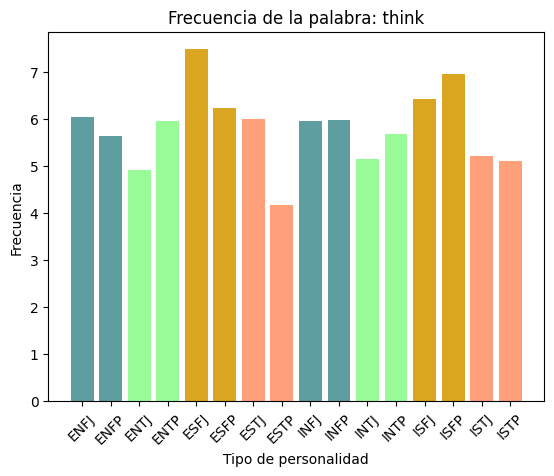

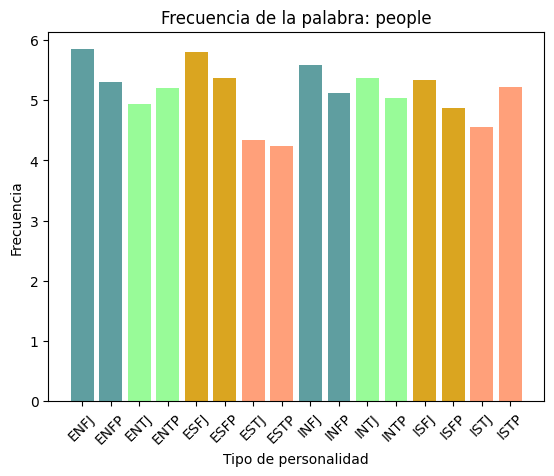

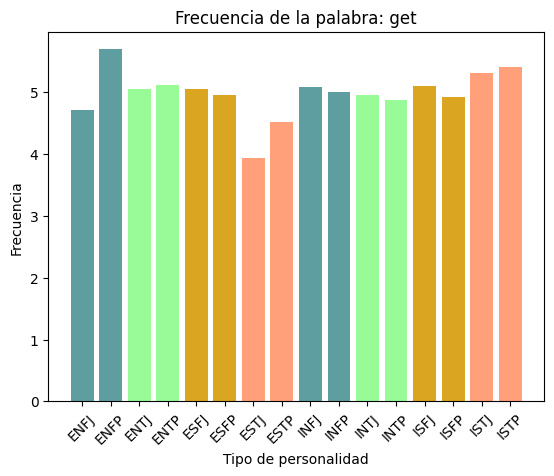

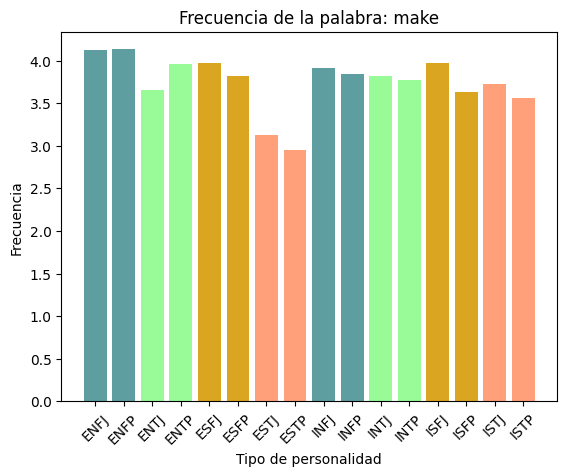

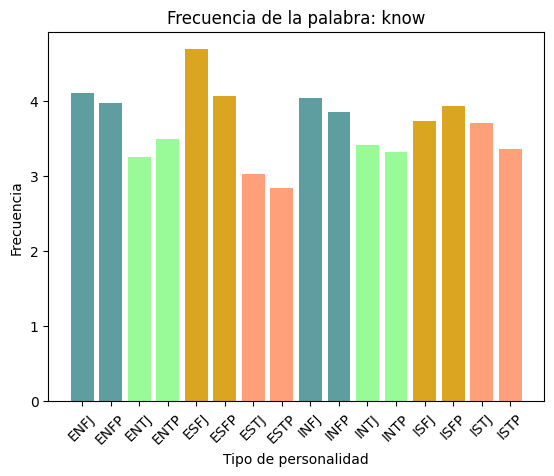

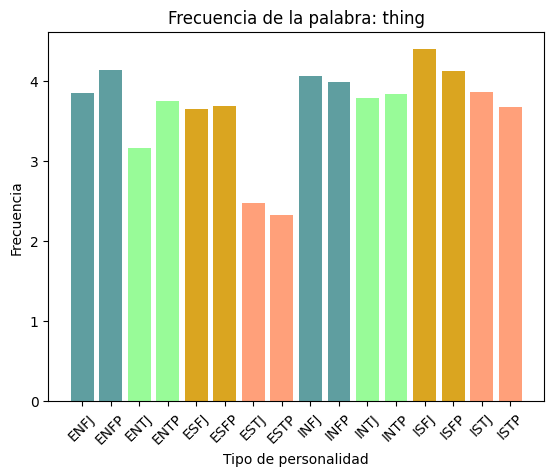

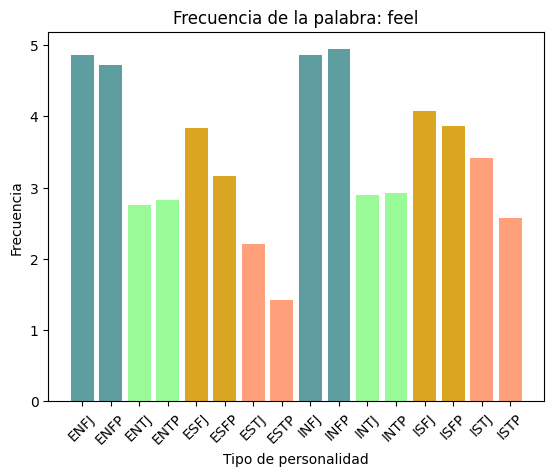

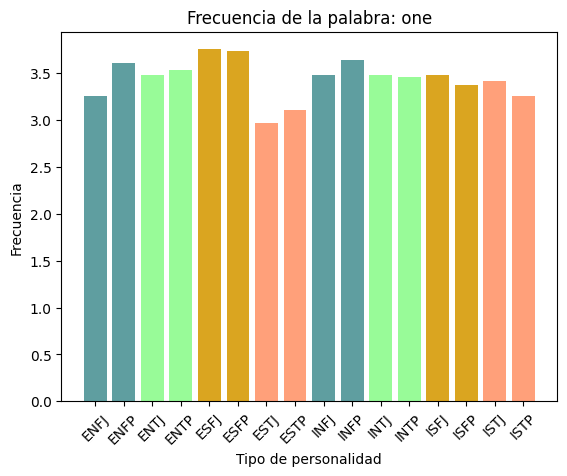

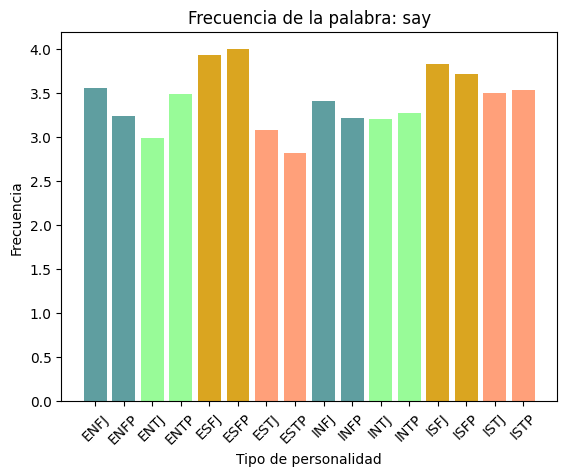

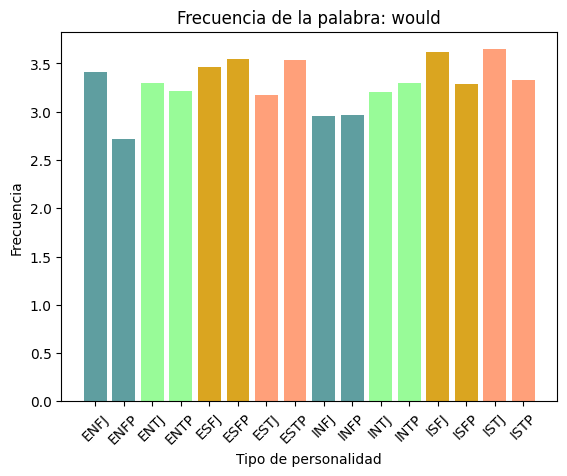

In [217]:
# Obtenemos la suma de las repeticiones de cada palabra
frecuencia = group_mbti.iloc[:,1:].sum()

# Seleccionamos las 5 más repetidas
top_10 = frecuencia.nlargest(10)

# Vamos a colorear las barras dependiendo el subgrupo en el que se encuentren
color_mapping = {
    'NT' : 'palegreen',
    'NF' : 'cadetblue',
    'SF' : 'goldenrod',
    'ST' : 'lightsalmon'
}

for word in top_10.index:
    frecuencias = mbti[word].tolist()

    # Graficamos la frecuecia de las 5 palabras para cada grupo
    plt.bar(mbti['personality'], frecuencias,  color=[color_mapping[group] for group in mbti['grupo']])
    plt.xlabel('Tipo de personalidad')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de la palabra: {word}')
    plt.xticks(rotation=45)

    plt.show()


#### Las 5 palabras más repetidas por cada subgrupo

In [173]:
mbti_subgrupos = mbti.drop(['get', 'like', 'count'], axis=1)


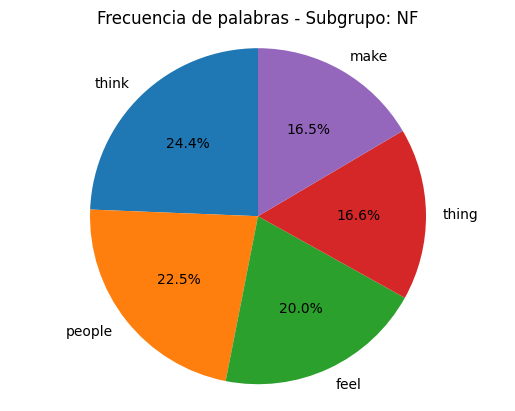

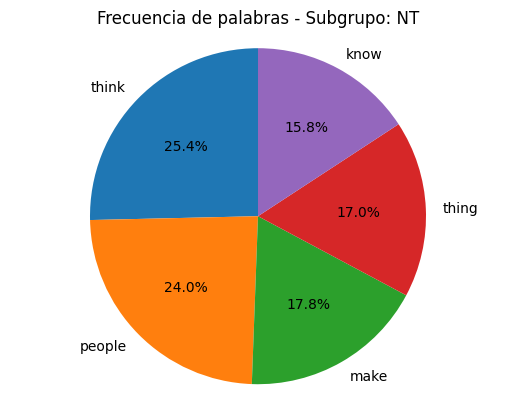

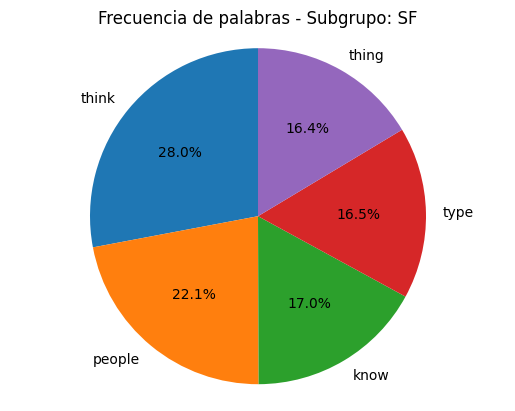

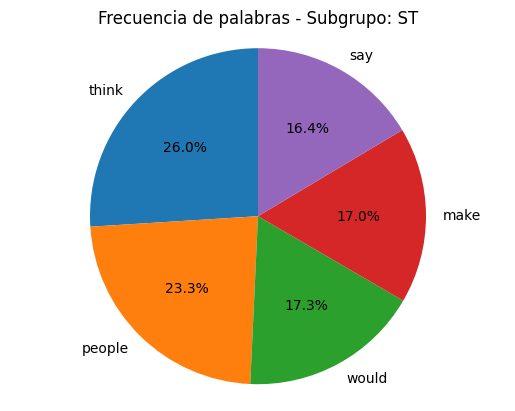

In [174]:
subgrupos = mbti_subgrupos['grupo'].unique()

for subgrupo in subgrupos:
    df_subgrupo = mbti_subgrupos[mbti_subgrupos['grupo'] == subgrupo]

    top_palabras =  df_subgrupo.iloc[:,1:-1].sum().sort_values(ascending=False).head(5).index

    frecuencias = df_subgrupo[top_palabras].sum()
    
    plt.pie(frecuencias, labels=top_palabras, autopct='%1.1f%%', startangle=90)
    plt.title(f"Frecuencia de palabras - Subgrupo: {subgrupo}")
    plt.axis('equal')
    plt.show()  
